In [18]:
import pandas as pd
import math
from statsmodels.tsa.stattools import adfuller

# Load the dataset
data = pd.read_csv("TFTP_mini.csv")

ddos_detected_true = 0
ddos_detected_false = 0
ddos_true = 22
ddos_false = 20
degrees_of_ddos = []
def calculate_entropy(data, normalized=True):
    frequency = data.value_counts()
    entropy = 0.0
    normalized_ent = 0.0
    n = 0

    if len(frequency) <= 1:
        return None, None

    for i, x in list(enumerate(frequency.index)):
        try:
            p_x = frequency[x] / sum(frequency)
            if p_x > 0:
                n += 1
                entropy += -p_x * math.log(p_x, 2)
        except KeyError:
            continue

    if normalized:
        if math.log(n) > 0:
            normalized_ent = entropy / math.log(n, 2)
            return entropy, normalized_ent
    else:
        return entropy



# Select relevant columns for analysis
columns = ["Timestamp", "Total Length of Fwd Packets", "Total Length of Bwd Packets", "Flow Duration"]
selected_data = data[columns]

# Convert Timestamp column to datetime object
selected_data["Timestamp"] = pd.to_datetime(selected_data["Timestamp"])

# Sort the data by Timestamp
selected_data.sort_values(by="Timestamp", inplace=True)

# Set the window size
window_size = 5000

# Split the data into windows
windows = [selected_data[i : i + window_size] for i in range(0, len(selected_data), window_size)]

for window in windows:
    # Convert Timestamp to Unix timestamps
    numeric_time = window["Timestamp"].apply(lambda x: x.timestamp())

    # Perform ADF test on the numerical time data
    result = adfuller(numeric_time)
    p_value = result[1]

    threshold = 0.05
    print("ADF p-value:", p_value)

    if p_value < threshold:
        print("DDoS attack detected in the window.")
        ddos_detected_true = ddos_detected_true + 1
    else:
        # Additional steps for entropy calculation and detection
        flow_size = window["Total Length of Fwd Packets"] + window["Total Length of Bwd Packets"]
        flow_rate = flow_size / window["Flow Duration"]
        flow_duration = window["Flow Duration"]
        flow_length = window["Total Length of Fwd Packets"] + window["Total Length of Bwd Packets"]

        # Calculate entropy for each parameter
        entropy_flow_size, normalized_entropy_flow_size = calculate_entropy(flow_size)
        entropy_flow_rate, normalized_entropy_flow_rate = calculate_entropy(flow_rate)
        entropy_flow_duration, normalized_entropy_flow_duration = calculate_entropy(flow_duration)
        entropy_flow_length, normalized_entropy_flow_length = calculate_entropy(flow_length)

        if entropy_flow_size is not None:
            print("Entropy (Flow Size):", entropy_flow_size)
            print("Normalized Entropy (Flow Size):", normalized_entropy_flow_size)
        else:
            print("Entropy (Flow Size): Not enough data")
        
        if entropy_flow_rate is not None:
            print("Entropy (Flow Rate):", entropy_flow_rate)
            print("Normalized Entropy (Flow Rate):", normalized_entropy_flow_rate)
        else:
            print("Entropy (Flow Rate): Not enough data")
        


        if entropy_flow_duration is not None:
            print("Entropy (Flow Duration):", entropy_flow_duration)
            print("Normalized Entropy (Flow Duration):", normalized_entropy_flow_duration)
        else:
            print("Entropy (Flow Duration): Not enough data")
        
        if entropy_flow_length is not None:
            print("Entropy (Flow Length):", entropy_flow_length)
            print("Normalized Entropy (Flow Length):", normalized_entropy_flow_length)
        else:
            print("Entropy (Flow Length): Not enough data")

        # Calculate degree of DDoS attack
        # Calculate degree of DDoS attack
        entropy_values = [
        normalized_entropy_flow_size,
        normalized_entropy_flow_rate,
        normalized_entropy_flow_duration,
        normalized_entropy_flow_length,
        ]

        valid_entropy_values = [val for val in entropy_values if val is not None]

        if valid_entropy_values:
            degree_of_ddos = sum(valid_entropy_values) / len(valid_entropy_values)
            print("Degree of DDoS Attack:", degree_of_ddos)
            degrees_of_ddos.append(degree_of_ddos)
            if degree_of_ddos > 0.5:
                print("DDoS attack detected.")
                ddos_detected_true = ddos_detected_true + 1
            else:
                print("No DDoS attack detected.")
                ddos_detected_false = ddos_detected_false + 1
        else:
            print("Insufficient data for entropy calculation.")
            
print("True ", ddos_detected_true)
print("False", ddos_detected_false)
accuracy = (ddos_detected_true/ddos_true + ddos_detected_false/ddos_false)/2
print(round(accuracy,2))


C:\Users\DELL\AppData\Local\Temp\ipykernel_5468\1648332831.py:6: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("TFTP_mini.csv")
C:\Users\DELL\AppData\Local\Temp\ipykernel_5468\1648332831.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data["Timestamp"] = pd.to_datetime(selected_data["Timestamp"])
C:\Users\DELL\AppData\Local\Temp\ipykernel_5468\1648332831.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data.sort_values(by="Timestamp", inplace=True)


ADF p-value: 0.9966323728821541
Entropy (Flow Size): 2.7149395930097264
Normalized Entropy (Flow Size): 0.5647470671559446
Entropy (Flow Rate): 8.111344309035585
Normalized Entropy (Flow Rate): 0.7120348073376694
Entropy (Flow Duration): 8.507566736358054
Normalized Entropy (Flow Duration): 0.7424738031665131
Entropy (Flow Length): 2.7149395930097264
Normalized Entropy (Flow Length): 0.5647470671559446
Degree of DDoS Attack: 0.646000686204018
DDoS attack detected.
ADF p-value: 1.0
Entropy (Flow Size): 1.7773431142916627
Normalized Entropy (Flow Size): 0.4668183425702628
Entropy (Flow Rate): 9.957927785640019
Normalized Entropy (Flow Rate): 0.8542538701664854
Entropy (Flow Duration): 9.956556835045564
Normalized Entropy (Flow Duration): 0.8542017626070897
Entropy (Flow Length): 1.7773431142916627
Normalized Entropy (Flow Length): 0.4668183425702628
Degree of DDoS Attack: 0.6605230794785252
DDoS attack detected.
ADF p-value: 1.0
Entropy (Flow Size): 1.6268345937847097
Normalized Entropy 

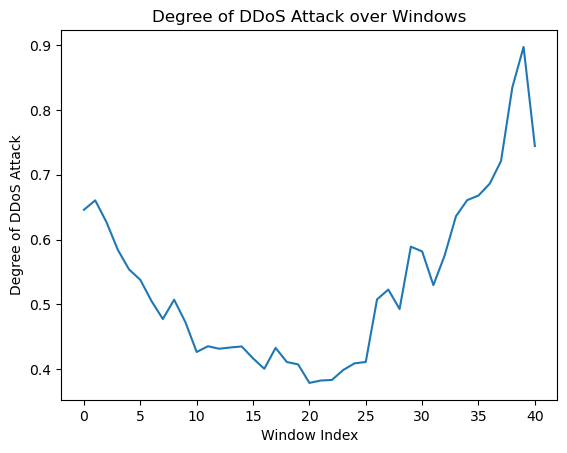

In [19]:
# Plotting the results
plt.plot(degrees_of_ddos)
plt.xlabel("Window Index")
plt.ylabel("Degree of DDoS Attack")
plt.title("Degree of DDoS Attack over Windows")
plt.show()